In [174]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm
from scipy import integrate

# show plots in notebook
%matplotlib inline

# define system in terms of separated differential equations

I = 0.5;
a = .1;
eps = .1;
gamma = .25;

def f(v,w):
    return I + v*(1-v)*(v-a)-w
def g(v,w):
    return eps*(v-gamma*w)

# initialize lists containing values
v = []
w = []

#iv1, iv2 = initial values, dt = timestep, time = range

# define a template for our function or system called “sys”
def sys(iv1, iv2, dt, time):
    # initial values:
    v.append(iv1)
    w.append(iv2)
    #z.append(iv3)
    # compute and fill lists
    for i in range(time):
        v.append(v[i] + (f(v[i],w[i])) * dt)
        w.append(w[i] + (g(v[i],w[i])) * dt)
        #z.append(z[i] + (h(x[i],y[i],z[i])) * dt)
    return v, w

# Call sys function with initial values
sys(0.001, 0.001, 0.1, 1000)

438,
  0.7778000977293222,
  0.7828311125157676,
  0.7876978171419672,
  0.7923957474924853,
  0.7969201628176753,
  0.8012660298879479,
  0.8054280072998103,
  0.8094004303250085,
  0.8131772968173364,
  0.8167522548432804,
  0.8201185928869986,
  0.8232692337012414,
  0.8261967331367811,
  0.8288932855848599,
  0.8313507380077564,
  0.8335606149039994,
  0.8355141569409459,
  0.8372023763606044,
  0.8386161325811283,
  0.8397462316126777,
  0.8405835528949741,
  0.8411192068323318,
  0.8413447255154932,
  0.8412522877319317,
  0.8408349772413471,
  0.8400870703412815,
  0.8390043449771951,
  0.837584399229479,
  0.8358269623229322,
  0.8337341769907763,
  0.8313108289528304,
  0.8285644984214435,
  0.8255056108208891,
  0.8221473698071418,
  0.8185055650494532,
  0.8145982590914287,
  0.810445370183387,
  0.8060681790761776,
  0.8014887953199736,
  0.7967296212554023,
  0.7918128493434008,
  0.7867600216031091,
  0.7815916703700803,
  0.7763270492919288,
  0.770983954156304,
  0.7655

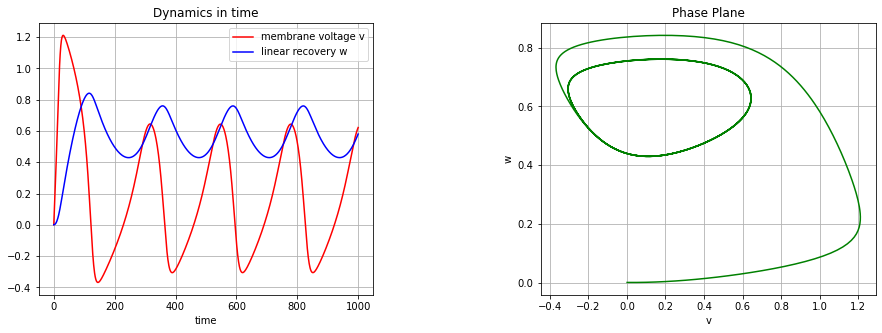

In [175]:
#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(v, 'r-', label='membrane voltage v')
ax1.plot(w, 'b-', label='linear recovery w')
#ax1.plot(z, 'g-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(v, w, color="green")
ax2.set_xlabel("v")
ax2.set_ylabel("w")  
ax2.set_title("Phase Plane")
ax2.grid()

In [176]:
# brute force: iterate through possibility space (r)
fp = []

def find_fixed_points(r):
    for v in range(r):
        for w in range(r):
            if ((f(v,w) == 0) and (g(v,w) == 0)):
                fp.append((v,w))
                print('The system has a fixed point in %s,%s' % (v,w))
    return fp

find_fixed_points(1000)

[]

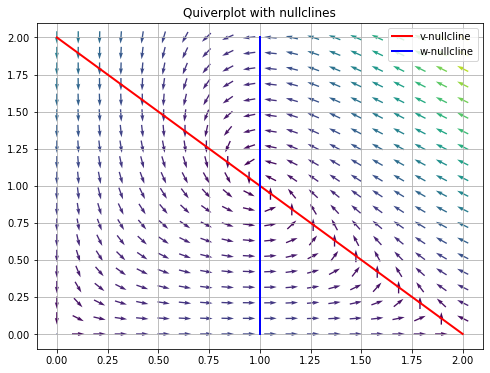

In [177]:
# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = v and x[1] = w    
    return np.array([ 2*X[0] - X[0]**2 - X[0]*X[1] , - X[1] + X[0]*X[1] ])

#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v = np.linspace(0,2,20)
w = np.arange(0,2,20)

# plot nullclines
ax4.plot([0,2],[2,0], 'r-', lw=2, label='v-nullcline')
ax4.plot([1,1],[0,2], 'b-', lw=2, label='w-nullcline')

# plot fixed points
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("Quiverplot with nullclines")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
v = np.linspace(0, 2, 20)
w = np.linspace(0, 2, 20)

X1 , Y1  = np.meshgrid(v, w)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.legend()
ax4.grid()

In [178]:
# needed to calculate (complex) squareroots of negative numbers
from cmath import sqrt

def eigenvalues(v,w):
    # I + v*(1-v)*(v-a)-w
    a11 = -3*v**2+2.2*v-.1          # differentiated with respect to v
    a12 = -1                       # differentiated with respect to w
    # eps*(v-gamma*w)
    a21 = .1                         # differentiated with respect to v
    a22 = -.025                   # differentiated with respect to w

    tr = a11 + a22
    det = a11*a22 - a12*a21
    lambda1 = (tr - sqrt(tr**2 - 4*det))/2
    lambda2 = (tr + sqrt(tr**2 - 4*det))/2
    print('Check the fixed point  %s, %s' % (v,w)) 
    print('The real part of the first eigenvalue is %s' %lambda1.real)
    print('The real part of the second eigenvalue is %s' % lambda2.real)    
    
    if (lambda1.real < 0 and lambda2.real < 0):
        print('The fixed point in %s, %s is a sink. It is stable' % (v,w))
    if (lambda1.real > 0 and lambda2.real > 0):
        print('The fixed point in %s, %s is a source. It is unstable' % (v,w))
    if (lambda1.real > 0 and lambda2.real < 0):
        print('The fixed point in %s, %s is a saddle. It is unstable' % (v,w))
    if (lambda1.real < 0 and lambda2.real > 0):
        print('The fixed point in %s, %s is unstable' % (x,y))
    print('----------------------------')
    return lambda1 , lambda2

# iterate through list of fixed points
for v,w in fp:
    eigenvalues(v,w)   